In [1]:
import pandas as pd
import numpy as np
from ete3 import Tree
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)
from pandas.api.types import is_numeric_dtype
import seaborn as sns
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import os

INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
do_weighted = True
trans_method = "delta"
null_method = "patefield"

base_relevant_features = ["weighted NODF", # nestedness measures
                          "NODF",
                         "weighted connectance",
                         "connectance",
                         "modularity",
                         "robustness.LL"] # modularity mesure, when there is only one compartment, the divsrity is nan
relevant_features = base_relevant_features+[f"null_standardized_{f}" for f in base_relevant_features]
relevant_metadata = ['is_polyploid_poly_frac', 'is_polyploid_missing_frac']
                          
network_polyploid_data_path = "../../../data/ploidy_classification/network_classification.csv"
taxonomic_data_path = "../../../data/features/taxonomic_features/net_to_pollinators_taxonomic_classification.csv"
networks_metadata_path = "../../../data/networks/networks_metadata.csv"
plant_metadata_path = "../../../data/S2.csv"
ecoregions_metadata_path = "../../../data/metadata/network_level/ecoregions_metadata_rice_2019.xlsx"
ecoregions_polyfreq_path = "../../../data/metadata/network_level/ecoregions_polyfreq_rice_2019.xlsx"

allmb_tree_path = "../../../data/trees/families_mrca_based_tree.nwk"
networks_dir = "../../../data/networks/all/"

features_paths = {"binary": f"../../../data/features/network/binary/features_with_classification_{trans_method}_standardized_with_{null_method}_simulations.csv",
                  "binarized_weighted": f"../../../data/features/network/binarized_weighted/features_with_classification_{trans_method}_standardized_with_{null_method}_simulations.csv",
                  "weighted": f"../../../data/features/network/weighted/features_with_classification_{trans_method}_standardized_with_{null_method}_simulations.csv"}

processed_data_path = f"../../../data/statistical_analysis/network_level/processed_features_with_ploidy_classification_on_{'un' if not do_weighted else ''}weighted_networks_{trans_method}_standardized_with_{null_method}_simulations.csv"

max_missing_threshold = 0.5
min_classified_threshold = 6
min_poly_threhold = 0
min_di_threshold = 0
min_plants = 6
min_pollinators = 6

In [8]:
# df = pd.read_csv(processed_data_path)
from scipy import stats

In [14]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["network_size"].to_numpy(),df["connectance"])
print(f"unstandardized connectance = {slope, intercept, r_value, p_value, std_err}")
slope, intercept, r_value, p_value, std_err = stats.linregress(df["network_size"].to_numpy(),df["Connectance"])
print(f"standardized connectance = {slope, intercept, r_value, p_value, std_err}")

slope, intercept, r_value, p_value, std_err = stats.linregress(df["network_size"].to_numpy(),df["weighted NODF"])
print(f"unstandardized nedtedness = {slope, intercept, r_value, p_value, std_err}")
slope, intercept, r_value, p_value, std_err = stats.linregress(df["network_size"].to_numpy(),df["Nestedness"])
print(f"standardized nestedness = {slope, intercept, r_value, p_value, std_err}")

slope, intercept, r_value, p_value, std_err = stats.linregress(df["network_size"].to_numpy(),df["modularity"])
print(f"unstandardized modularity = {slope, intercept, r_value, p_value, std_err}")
slope, intercept, r_value, p_value, std_err = stats.linregress(df["network_size"].to_numpy(),df["Modularity"])
print(f"standardized modularity = {slope, intercept, r_value, p_value, std_err}")

slope, intercept, r_value, p_value, std_err = stats.linregress(df["network_size"].to_numpy(),df["robustness.LL"])
print(f"unstandardized robustness = {slope, intercept, r_value, p_value, std_err}")
slope, intercept, r_value, p_value, std_err = stats.linregress(df["network_size"].to_numpy(),df["Robustness"])
print(f"standardized robustness = {slope, intercept, r_value, p_value, std_err}")

unstandardized connectance = (-0.001021254320019572, 0.2187616916672222, -0.5444000680912605, 4.340819921023569e-28, 8.484148194354549e-05)
standardized connectance = (0.0005486661417210405, -0.11052416471152866, 0.24049602761878675, 6.072055535150937e-06, 0.00011939434182872805)
unstandardized nedtedness = (-0.029318850630797724, 15.247005962832551, -0.11458725484897458, 0.03310924773786638, 0.013704440994723703)
standardized nestedness = (0.030626144894175183, -24.514452715089792, 0.09741119933069586, 0.07034199839736628, 0.016870730402519615)
unstandardized modularity = (0.00042930074564852423, 0.46246717914730046, 0.11574902837281725, 0.03135760996546842, 0.0001986260009981577)
standardized modularity = (0.0007014155167792934, 0.20044132441326243, 0.22475513589949825, 2.4466280692513618e-05, 0.00016395724296237044)
unstandardized robustness = (0.0007265289209212428, 0.47004068723127185, 0.40173285195754427, 7.507629141394686e-15, 8.929282054243056e-05)
standardized robustness = (0.

In [19]:
df.pollinators_rank_name.unique()

array(['Species', 'Family'], dtype=object)

In [18]:
df.groupby("pollinators_rank_name")[["Connectance", "Nestedness", "Modularity", "Robustness"]].mean()

,Connectance,Nestedness,Modularity,Robustness
pollinators_rank_name,,,,
Family,-0.207090,-32.162646,0.389171,-0.110112
Species,-0.082413,-22.912226,0.231801,-0.063736


In [20]:
df.groupby("pollinators_rank_name")[["connectance", "weighted NODF", "modularity", "robustness.LL"]].mean()

,connectance,weighted NODF,modularity,robustness.LL
pollinators_rank_name,,,,
Family,0.241915,24.411667,0.463029,0.510085
Species,0.168734,13.686149,0.483346,0.504802


# form processed dataset

In [27]:
networks_metadata = pd.read_csv(networks_metadata_path)
networks_metadata["included_in_analysis"] = networks_metadata.apply(lambda rec: rec.is_polyploid_missing_frac <= max_missing_threshold and 
                                                              rec.num_classified >= min_classified_threshold and 
                                                              rec.num_polyploids >= min_poly_threhold and 
                                                              rec.num_diploids >= min_di_threshold and
                                                              rec.num_plants >= min_plants and
                                                              rec.num_pollinators >= min_pollinators, axis=1)


networks_metadata = networks_metadata.loc[networks_metadata.included_in_analysis].dropna(subset=['AnnualMeanTemperature', 'AnnualPrecipitation',
                'TemperatureSeasonality',"PrecipitationSeasonality",
                'MeanTemperatureofWarmestQuarter','PrecipitationofWarmestQuarter', "Isothermality",
                'frac_herb','frac_flw_rest','frac_sc',"network_size"])
# networks_metadata = networks_metadata.loc[networks_metadata.network_type != "weighted"]
print(f"# networks included in analysis = {networks_metadata.shape[0]:,}")
networks_metadata.groupby("network_type").network_index.count()

# networks included in analysis = 775


network_type
binarized_weighted    364
binary                 47
weighted              364
Name: network_index, dtype: int64

In [28]:
relevant_columns = ["network_index"] + relevant_features + relevant_metadata
weighted_data = pd.DataFrame()
if os.path.exists(features_paths["weighted"]):
    weighted_data = pd.read_csv(features_paths["weighted"])[relevant_columns]
    if not is_numeric_dtype(weighted_data.network_index):
        weighted_data['network_index'] = weighted_data.network.str.replace(".csv","").astype("int")
    weighted_data["network_type"] = "weighted"

binarized_weighted_data = pd.read_csv(features_paths["binarized_weighted"])[relevant_columns]
if not is_numeric_dtype(binarized_weighted_data.network_index):
    binarized_weighted_data['network_index'] = binarized_weighted_data.network.str.replace(".csv","").astype("int")
binarized_weighted_data["network_type"] = "binarized_weighted"

binary_data = pd.read_csv(features_paths["binary"])[relevant_columns]
if not is_numeric_dtype(binary_data.network_index):
    binary_data['network_index'] = binary_data.network.str.replace(".csv","").astype("int")
binary_data["network_type"] = "binary"  

features = pd.concat([weighted_data,binarized_weighted_data,binary_data]).rename(columns={"network_id": "network_index"})
features = features[[c for c in features.columns if not "Unnamed" in c]].drop_duplicates(["network_index", "network_type"])
features = features.dropna(subset=["is_polyploid_poly_frac"])
features = features.merge(networks_metadata[["network_type", "network_index", "plants_taxonomic_level", "path", "num_plants", "num_pollinators"]], on=["network_type", "network_index"], how="left")
features = features.loc[features.path.notna()] # remove duplicated networks

In [29]:
clean_features = features
clean_features.groupby("network_type")["network_index"].count()

network_type
binarized_weighted    355
binary                 45
weighted              346
Name: network_index, dtype: int64

In [30]:
if do_weighted:
    clean_features = clean_features.loc[clean_features.network_type == "weighted"]
else:
    clean_features = clean_features.loc[clean_features.network_type != "weighted"]
clean_features = clean_features.dropna()

In [31]:
print(f"# networks = {clean_features.shape[0]:,}")

# networks = 400


In [32]:
clean_features.notna().sum() / clean_features.shape[0]

network_index                             1.0
weighted NODF                             1.0
NODF                                      1.0
weighted connectance                      1.0
connectance                               1.0
modularity                                1.0
robustness.LL                             1.0
null_standardized_weighted NODF           1.0
null_standardized_NODF                    1.0
null_standardized_weighted connectance    1.0
null_standardized_connectance             1.0
null_standardized_modularity              1.0
null_standardized_robustness.LL           1.0
is_polyploid_poly_frac                    1.0
is_polyploid_missing_frac                 1.0
network_type                              1.0
plants_taxonomic_level                    1.0
path                                      1.0
num_plants                                1.0
num_pollinators                           1.0
dtype: float64

# compute phylogenetic diversity on remaining networks

In [9]:
tree = Tree(allmb_tree_path, format=1)
for l in tree.get_leaves():
    l.name = l.name.replace("_", " ").lower()

In [94]:
def get_phylogenetic_diveristy(network_path: str) -> float:
    try:
        network = pd.read_csv(network_path)
        plants = network.Plant.str.lower().tolist()
        plants_in_tree = set(plants) & set(tree.get_leaf_names())
        max_tbl = np.sum([n.dist for n in tree.traverse()])
        network_tree = tree.copy()
        network_tree.prune(plants_in_tree)
        phylo_divesity = np.sum([n.dist for n in network_tree.traverse()]) / len(network_tree.get_leaves())
        return phylo_divesity
    except Exception as e:
        # print(f"network_path={network_path}, error={e}")
        return max_tbl

clean_features["pd"] = clean_features.parallel_apply(lambda rec: get_phylogenetic_diveristy(f"../../../data/networks/all/{rec.network_type}/{rec.network_index}.csv"), axis=1)

In [95]:
clean_features.network_id = clean_features.network_index.astype(str) + "_" + clean_features.network_type

/tmp/ipykernel_39028/1525001505.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  clean_features.network_id = clean_features.network_index.astype(str) + "_" + clean_features.network_type


<AxesSubplot: >

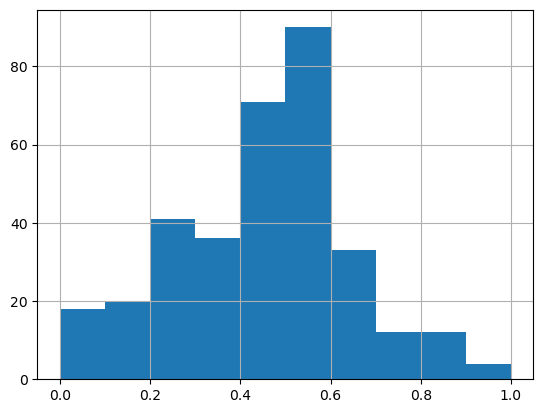

In [96]:
clean_features.is_polyploid_poly_frac.hist()

<AxesSubplot: >

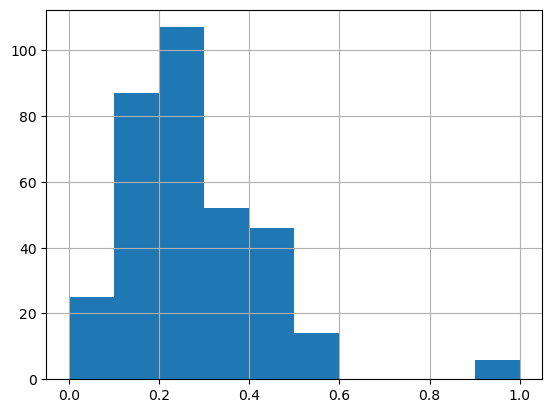

In [97]:
clean_features.is_polyploid_missing_frac.hist()

# save data

In [33]:
relevant_features = base_relevant_features + [f"null_standardized_{f}" for f in base_relevant_features]

In [34]:
clean_features = clean_features.drop_duplicates()
clean_features = clean_features.dropna(subset=relevant_features)
clean_features = clean_features.fillna(-1)
clean_features["has_polyploids"] = (clean_features.is_polyploid_poly_frac>0).astype(int)
print(f"# remaining records = {clean_features.shape[0]:,}")
clean_features.to_csv(processed_data_path)

# remaining records = 400


# devise plant-trait based features from plant trait data

In [35]:
plant_trait_cols = ['Growth_form', 'flw_shape_AST_head_level', 'n_flw_infl_AST_head_level','flw_symmetry_AST_head_level', 'mating_system']
plant_trait_data = pd.read_csv(plant_metadata_path)[["original_name"] + plant_trait_cols]   
plant_trait_data["is_herb"] = plant_trait_data.Growth_form.apply(lambda n: 1 if n == "herb" else (np.nan if pd.isna(n) else 0))
plant_trait_data["is_flw_rest"] = plant_trait_data.flw_shape_AST_head_level.apply(lambda n: 1 if n == "restrictive" else (np.nan if pd.isna(n) else 0))
plant_trait_data["is_multi_flw"] = plant_trait_data.n_flw_infl_AST_head_level.apply(lambda n: 1 if n == "multiple" else (np.nan if pd.isna(n) else 0))
plant_trait_data["is_symmetric"] = plant_trait_data.flw_symmetry_AST_head_level.apply(lambda n: 1 if n == "actinomorphic" else (np.nan if pd.isna(n) else 0))
plant_trait_data["is_sc"] = plant_trait_data.mating_system.apply(lambda n: np.nan if pd.isna(n) else (1 if "SC" in n else (np.nan if n=="unknown" else 0)))

In [36]:
def get_network_plants(network_path: str) -> list:
    try:
        net = pd.read_csv(network_path)
        if "Plant" not in net.columns:
            net = net.rename(columns={"Unnamed: 0": "Plant"})
        return net.Plant.str.lower().tolist()
    except Exception as e:
        print(network_path, e)
        return np.nan

def get_fracs_trait(plant_names: list, trait_dict: dict) -> list:
    plant_vals = np.array([trait_dict.get(p, np.nan) for p in plant_names])
    frac_ones = np.nansum(plant_vals) / sum(~np.isnan(plant_vals))
    frac_missing = sum(np.isnan(plant_vals))/len(plant_vals)
    return [frac_ones, frac_missing]
    
if "frac_flw_rest" not in networks_metadata.columns:
    networks_metadata["plants"] = networks_metadata.parallel_apply(lambda rec: get_network_plants(f"../../../data/networks/all/{rec.network_type}/{rec.network_index}.csv"), axis=1)
    for c in plant_trait_data.columns:
        if c.startswith("is_"):
            trait_dict = plant_trait_data.set_index("original_name")[c].to_dict()
            networks_metadata[[c.replace("is_", "frac_"), c.replace("is_", "frac_missing_")]] = networks_metadata.apply(lambda rec: get_fracs_trait(rec.plants, trait_dict=trait_dict), axis=1, result_type="expand")
            
networks_metadata["has_polyploids"] = (networks_metadata.is_polyploid_poly_frac > 0).astype(int)
if "plants" in networks_metadata.columns:
    networks_metadata.drop(["plants"], axis=1, inplace=True)

# merge with network metadata

In [37]:
clean_features = pd.read_csv(processed_data_path)
clean_features = clean_features[[c for c in clean_features.columns if not "Unnamed" in c]]

In [38]:
clean_features = clean_features.merge(networks_metadata, on=["network_type", "network_index"], how="left")
clean_features = clean_features.rename(columns={c: c.replace("_y","") for c in clean_features.columns if c.endswith("_y")}).drop([c for c in clean_features.columns if c.endswith("_x")], axis=1)
clean_features.to_csv(processed_data_path, index=False)

# rename columns

In [39]:
df = pd.read_csv(processed_data_path)
df = df.rename(columns={"is_polyploid_poly_frac": "FracPolyploids",
                        'frac_herb':"FracHerb",
                        'frac_flw_rest': "FracRestrictive",
                        'frac_sc': "FracSelfers",
                        "is_polyploid_missing_frac": "FracMissingPloidyClassifications",
                        "null_standardized_connectance": "Connectance",
                        "null_standardized_weighted connectance": "Weighted Connectance",
                        "null_standardized_NODF": "Nestedness",
                        "null_standardized_weighted NODF": "Weighted Nestedness",
                        "null_standardized_modularity": "Modularity",
                        "null_standardized_robustness.LL": "Robustness",
                        "polyploidPercent": "FracPolyploidsInEcoregion"}
if df.FracPolyploidsInEcoregion.max() > 1:
    df.FracPolyploidsInEcoregion = df.FracPolyploidsInEcoregion / 100
df.to_csv(processed_data_path, index=False)

# plot data

In [3]:
clean_features = pd.read_csv(processed_data_path)
clean_features = clean_features.loc[(clean_features.FracMissingPloidyClassifications <= max_missing_threshold) &
                                    (clean_features.num_classified >= min_classified_threshold) &
                                    (clean_features.num_polyploids >= min_poly_threhold) &
                                    (clean_features.num_diploids >= min_di_threshold) &
                                   (clean_features.num_pollinators >= min_pollinators)] 
print(f"# networks for analysis = {clean_features.shape[0]:,}")

# networks for analysis = 300


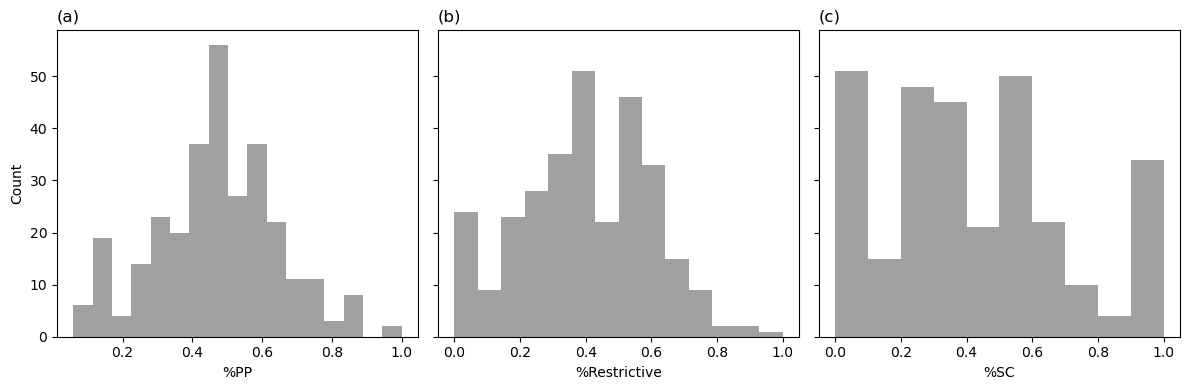

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharey=True)
sns.histplot(clean_features["FracPolyploids"], color="grey", lw=0, ax=ax[0])
ax[0].set_xlabel("%PP")
ax[0].set_title("(a)", loc="left")
sns.histplot(clean_features["FracRestrictive"], color="grey",  lw=0, ax=ax[1])
ax[1].set_xlabel("%Restrictive")
ax[1].set_title("(b)", loc="left")
sns.histplot(clean_features["FracSelfers"], color="grey", lw=0, ax=ax[2])
ax[2].set_xlabel("%SC")
ax[2].set_title("(c)", loc="left")
fig.tight_layout()
fig.savefig("../../../data/figures/FigS2.jpeg")

/groups/itay_mayrose/halabikeren/miniconda3/envs/ppn/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


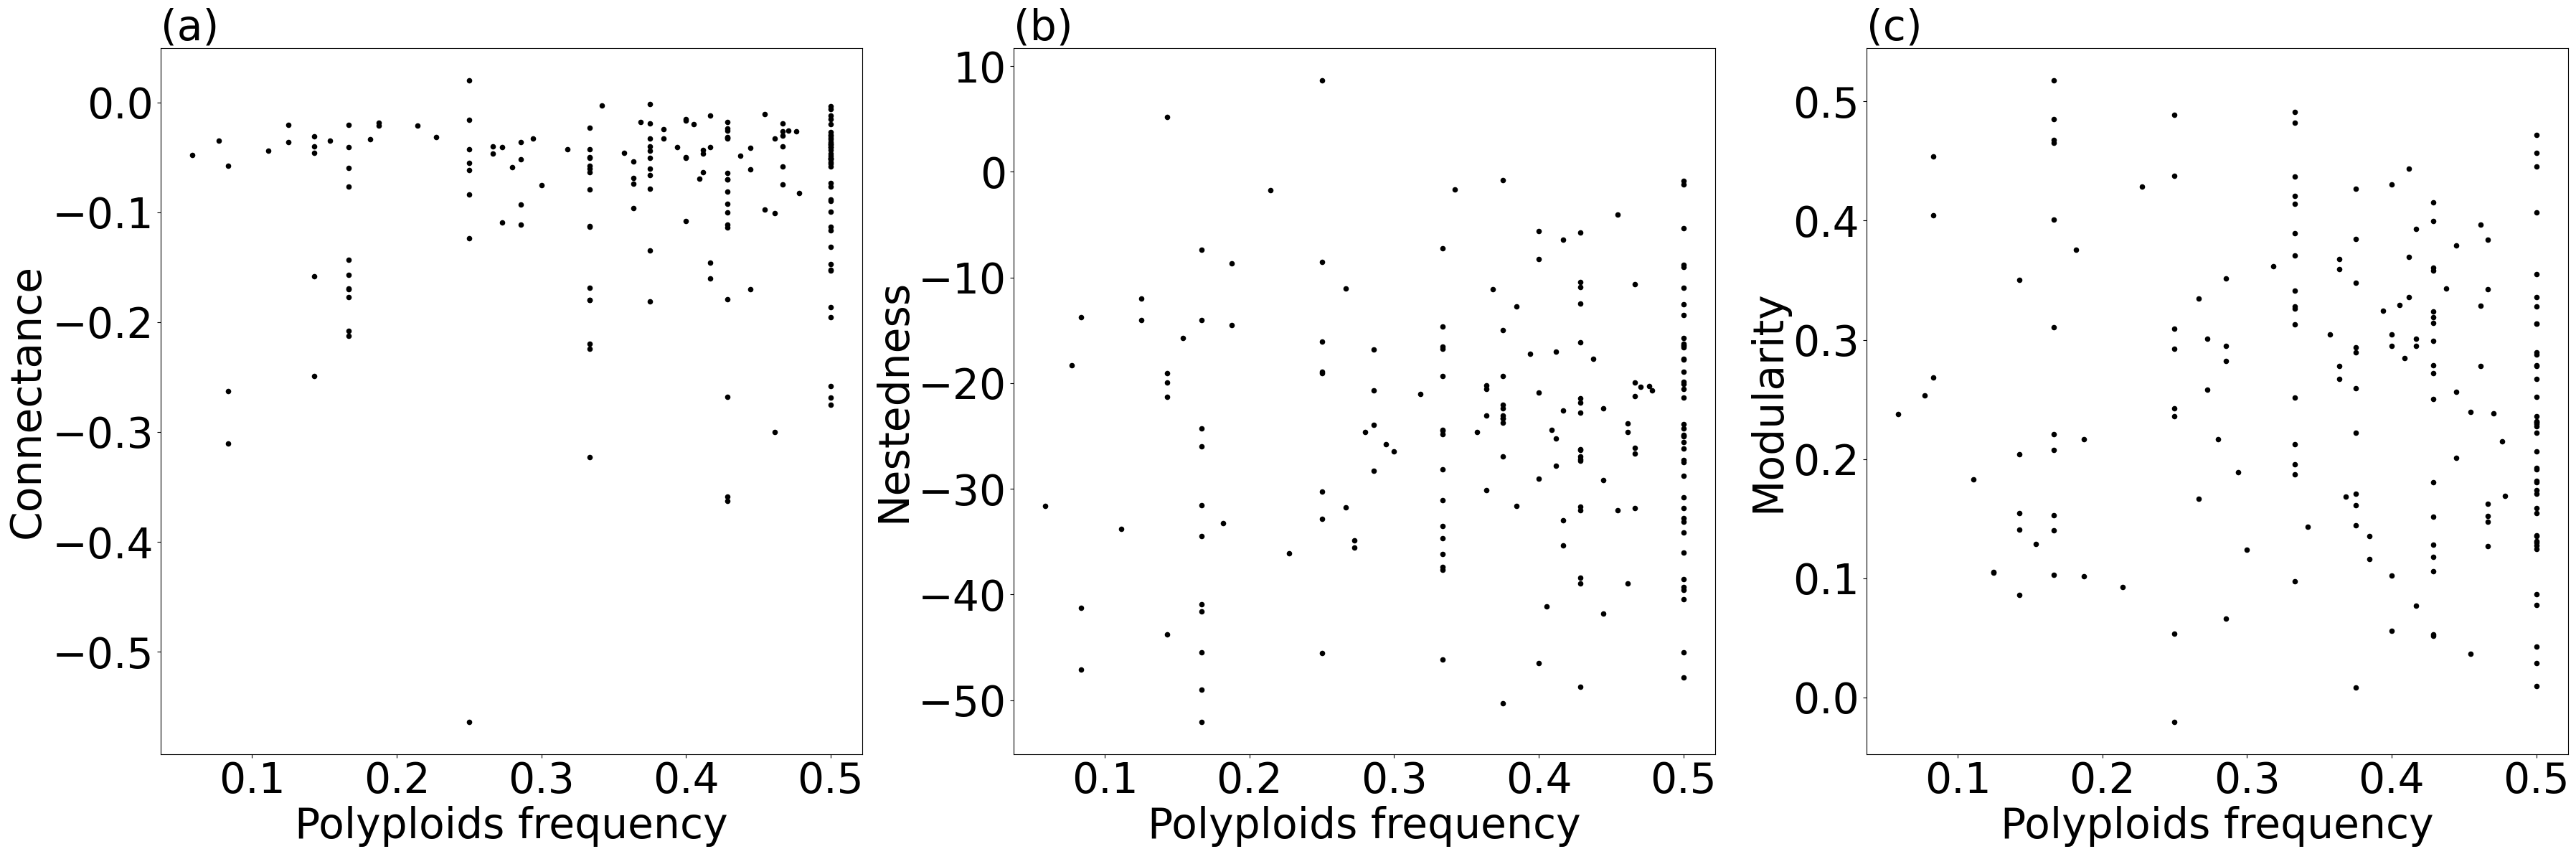

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["patch.force_edgecolor"] = False
fontsize = 42

plotting_features = clean_features#.loc[(clean_features.is_polyploid_missing_frac <= missing_data_threshold) & (clean_features.num_classified >= n_classified_threshold)]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(3*12, 1*12))
plotting_features = clean_features.loc[clean_features.FracPolyploids <= 0.5]

ax1 = ax[0]
ax1.set_title("(a)", loc="left", fontsize=fontsize)
plotting_features.plot.scatter(x="FracPolyploids", y="Connectance", ax=ax1, color="black")
ax1.set_xlabel("Polyploids frequency", fontsize=fontsize)
ax1.set_ylabel("Connectance", fontsize=fontsize)
ax1.tick_params(axis='both', which='major', labelsize=fontsize)
ax1.tick_params(axis='both', which='minor', labelsize=fontsize)


ax2 = ax[1]
ax2.set_title("(b)", loc="left", fontsize=fontsize)
plotting_features.plot.scatter(x="FracPolyploids", y="Nestedness", ax=ax2, color="black")
ax2.set_xlabel("Polyploids frequency", fontsize=fontsize)
ax2.set_ylabel("Nestedness", fontsize=fontsize)
ax2.tick_params(axis='both', which='major', labelsize=fontsize)
ax2.tick_params(axis='both', which='minor', labelsize=fontsize)


ax3 = ax[2]
ax3.set_title("(c)", loc="left", fontsize=fontsize)
plotting_features.plot.scatter(x="FracPolyploids", y="Modularity", ax=ax3, color="black")
ax3.set_xlabel("Polyploids frequency", fontsize=fontsize)
ax3.set_ylabel("Modularity", fontsize=fontsize)
ax3.tick_params(axis='both', which='major', labelsize=fontsize)
ax3.tick_params(axis='both', which='minor', labelsize=fontsize)


fig.tight_layout()
fig.savefig(f"../../../data/figures/fig3_{'binary' if not do_weighted else 'weighted'}.jpeg")

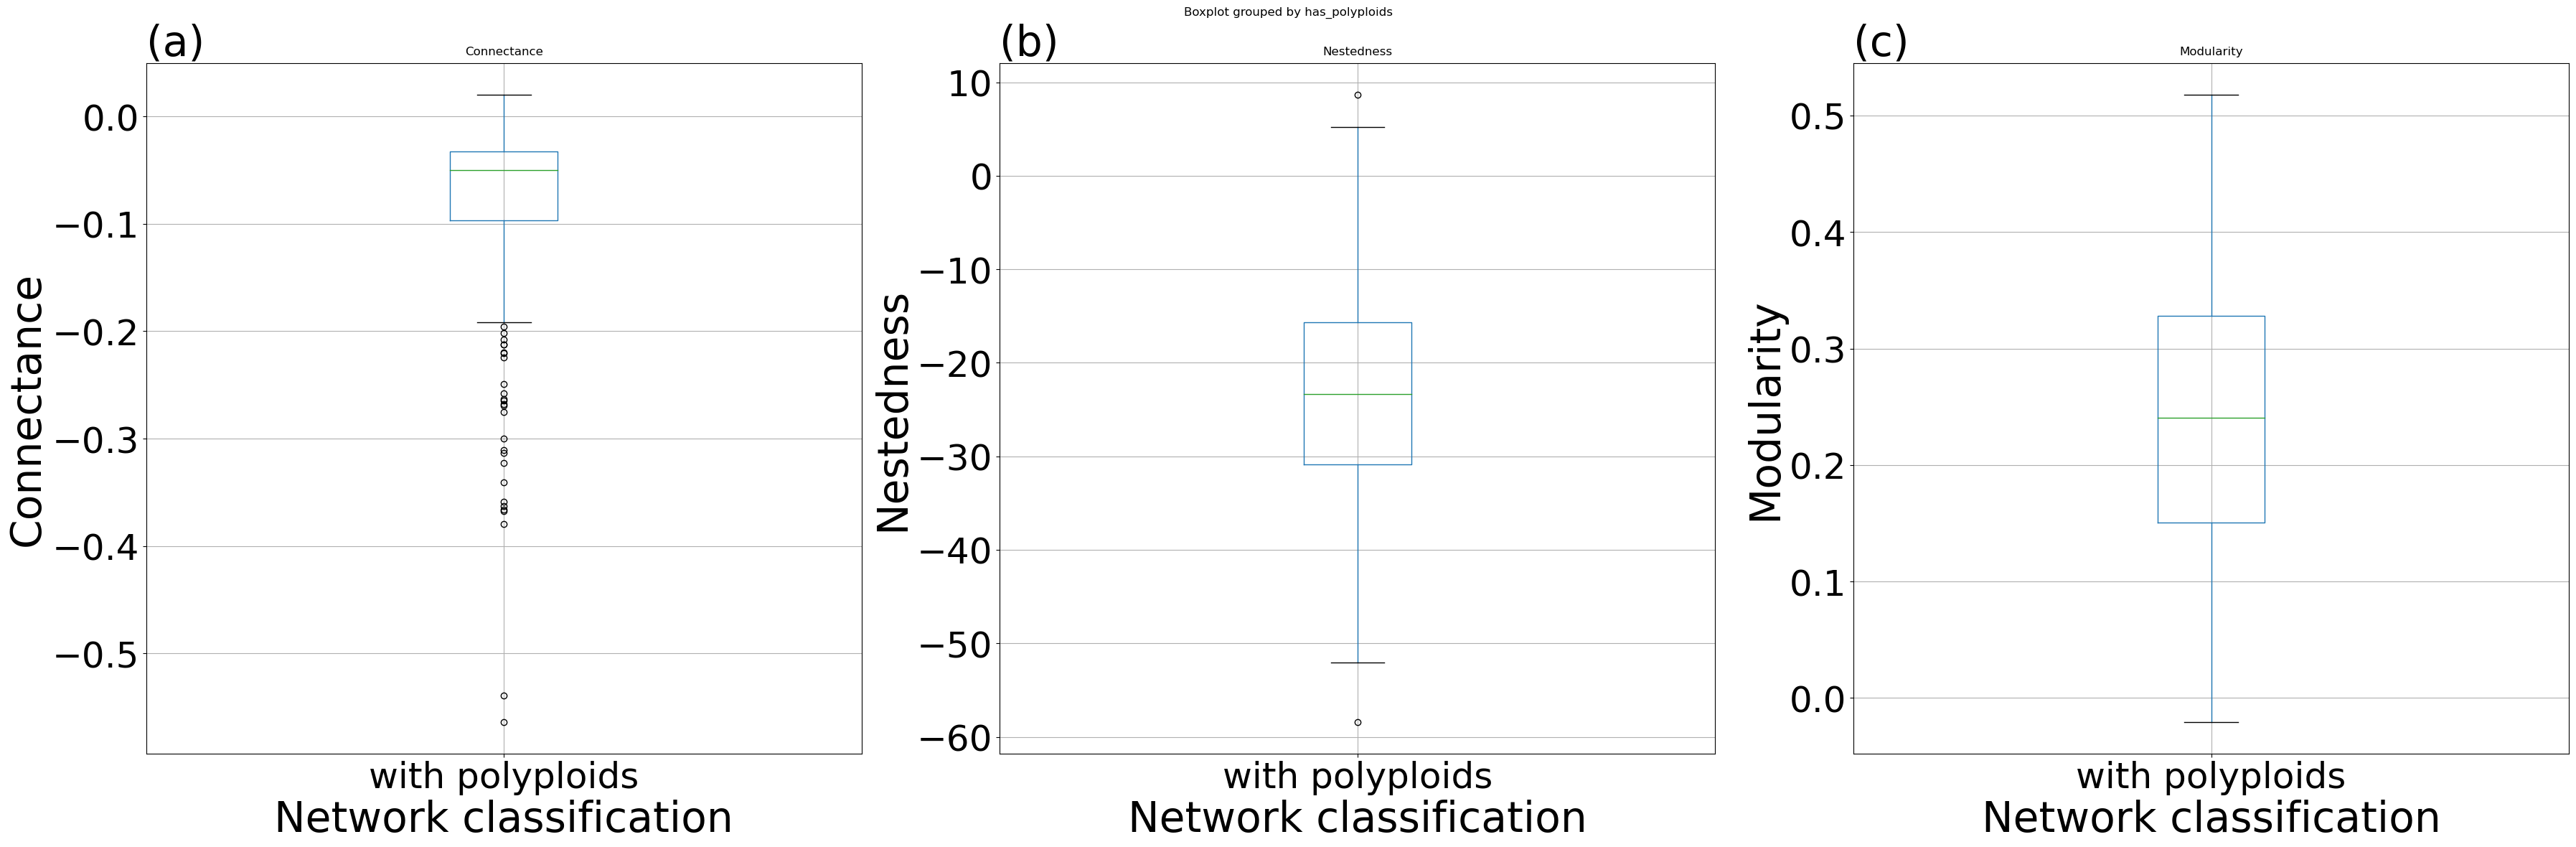

In [10]:
plotting_features = clean_features.copy()
plotting_features.has_polyploids = plotting_features.has_polyploids.replace({0: "without polyploids", 1: "with polyploids"}) 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(3*12, 1*12))

ax1 = ax[0]
ax1.set_title("(a)", loc="left", fontsize=fontsize)
plotting_features[["has_polyploids", "Connectance"]].boxplot(by="has_polyploids", ax=ax1)
ax1.set_ylabel("Connectance", fontsize=fontsize)
ax1.set_xlabel("Network classification",  fontsize=fontsize)
ax1.tick_params(axis='both', which='major', labelsize=fontsize-6)
ax1.tick_params(axis='both', which='minor', labelsize=fontsize-6)

ax2 = ax[1]
ax2.set_title("(b)", loc="left", fontsize=fontsize)
plotting_features[["has_polyploids", "Nestedness"]].boxplot(by="has_polyploids", ax=ax2)
ax2.set_ylabel("Nestedness", fontsize=fontsize)
ax2.set_xlabel("Network classification",  fontsize=fontsize)
ax2.tick_params(axis='both', which='major', labelsize=fontsize-6)
ax2.tick_params(axis='both', which='minor', labelsize=fontsize-6)

ax3 = ax[2]
ax3.set_title("(c)", loc="left", fontsize=fontsize)
plotting_features[["has_polyploids", "Modularity"]].boxplot(by="has_polyploids", ax=ax3)
ax3.set_ylabel("Modularity", fontsize=fontsize)
ax3.set_xlabel("Network classification",  fontsize=fontsize)
ax3.tick_params(axis='both', which='major', labelsize=fontsize-6)
ax3.tick_params(axis='both', which='minor', labelsize=fontsize-6)

fig.tight_layout()
fig.savefig(f"../../../data/figures/fig4_{'binary' if not do_weighted else 'weighted'}.jpeg")

In [12]:
from scipy import stats

conc_res = stats.kruskal(clean_features.loc[clean_features.has_polyploids == 0, "Connectance"].values, 
                         clean_features.loc[clean_features.has_polyploids == 1, "Connectance"].values)
print(f"Connectance = {conc_res}")

nest_res = stats.kruskal(clean_features.loc[clean_features.has_polyploids == 0, "Nestedness"].values, 
                         clean_features.loc[clean_features.has_polyploids == 1, "Nestedness"].values)
print(f"Nestedness = {nest_res}")

mod_res = stats.kruskal(clean_features.loc[clean_features.has_polyploids == 0, "Modularity"].values, 
                         clean_features.loc[clean_features.has_polyploids == 1, "Modularity"].values)
print(f"Modularity = {mod_res}")

Connectance = KruskalResult(statistic=nan, pvalue=nan)
Nestedness = KruskalResult(statistic=nan, pvalue=nan)
Modularity = KruskalResult(statistic=nan, pvalue=nan)


# plot for papers

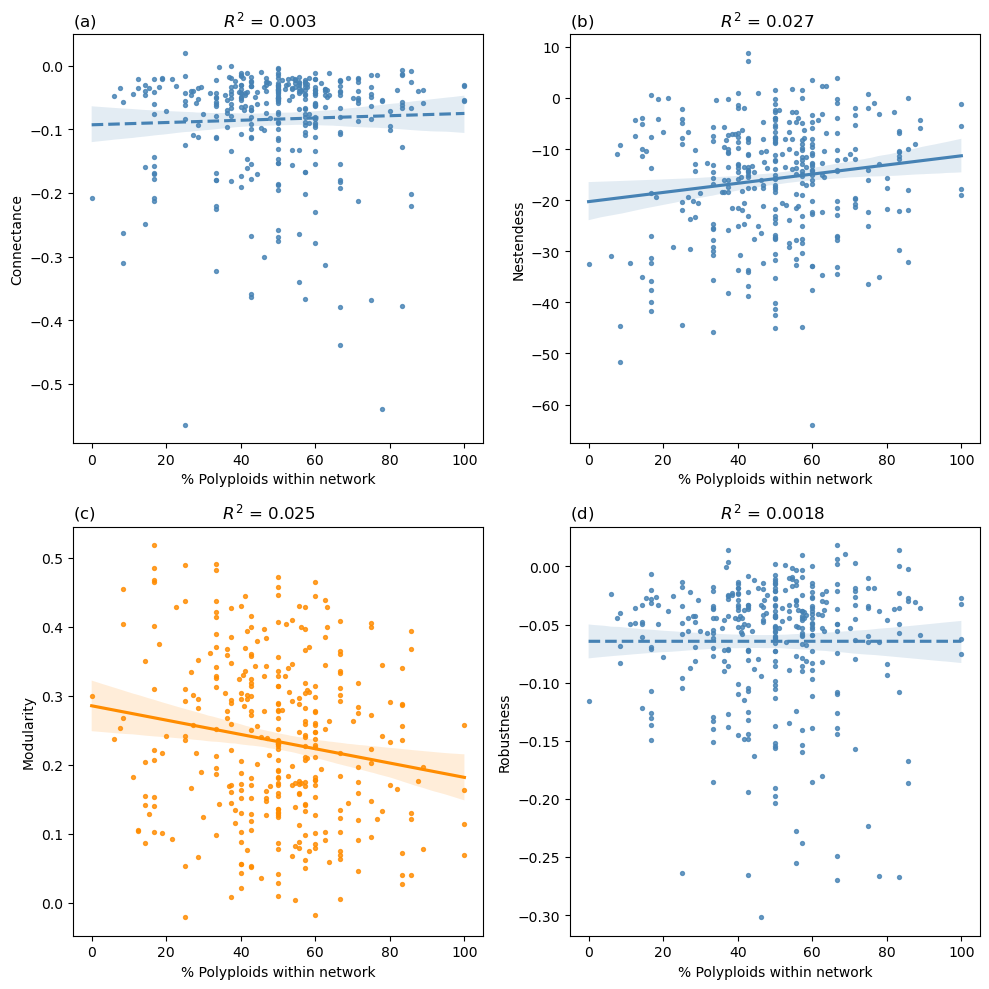

In [24]:
import scipy as sp

df = pd.read_csv(processed_data_path)
df["% Polyploids within network"] = df.FracPolyploids*100

def get_corr(x, y):
    r, p = sp.stats.pearsonr(x, y)
    return r
    
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

sns.regplot(x="% Polyploids within network", y='Connectance', data=df, scatter_kws={"s": 8}, ax=ax[0][0], color="steelblue", line_kws={"ls":"dashed"})
# ax[0][0].annotate(f'R = 0.059', (0.79, 0.95), xycoords='axes fraction')
title = r"(a)                        $R^2$ = 0.003"
ax[0][0].set_title(title, loc='left')

nest_varname = f'{"Weighted " if do_weighted else ""}Nestedness'
sns.regplot(x="% Polyploids within network", y=nest_varname, data=df, scatter_kws={"s": 8}, ax=ax[0][1], color="steelblue", line_kws={"ls":"solid"})
# ax[0][1].annotate(f'R = 0.166', (0.79, 0.95), xycoords='axes fraction')
ax[0][1].set_ylabel("Nestendess")
title = r"(b)                        $R^2$ = 0.027"
ax[0][1].set_title(title, loc='left')

sns.regplot(x="% Polyploids within network", y='Modularity', data=df, scatter_kws={"s": 8}, ax=ax[1][0], color="darkorange", line_kws={"ls":"solid"})
# ax[1][0].annotate(f'R = -0.157', (0.78, 0.95), xycoords='axes fraction')
title = r"(c)                        $R^2$ = 0.025"
ax[1][0].set_title(title, loc='left')

sns.regplot(x="% Polyploids within network", y='Robustness', data=df, scatter_kws={"s": 8}, ax=ax[1][1], color="steelblue", line_kws={"ls":"dashed"})
# ax[1][1].annotate(f'R = 0.009', (0.79, 0.95), xycoords='axes fraction')
title = r"(d)                        $R^2$ = 0.0018"
ax[1][1].set_title(title, loc='left')

fig.tight_layout()
fig.savefig(f"../../../data/figures/fig3_{'' if do_weighted else 'un'}weighted.svg")

In [23]:
# import matplotlib.pyplot as plt

# # Sample data (replace with your own data)
# # Create a scatterplot
# sns.scatterplot(df.FracPolyploids, df.FracRestrictive, c='blue', hue=df.Connectance, palette='viridis')

# # Customize the plot
# plt.xlabel("X-axis")
# plt.ylabel("Y-axis")
# plt.title("Interaction between Two Continuous Variables")
# plt.legend()

# # Show the plot
# plt.show()

In [61]:
plant_trait_db = pd.read_csv("../../../data/plant_traits_db.csv")
polyploids = plant_trait_db.loc[plant_trait_db.is_polyploid == 1][["original_name", "mating_system"]].dropna().drop_duplicates()
diploids = plant_trait_db.loc[plant_trait_db.is_polyploid == 0][["original_name", "mating_system"]].dropna().drop_duplicates()

In [62]:
polyploids.groupby("mating_system").count()/polyploids.shape[0]

,original_name
mating_system,
SC,0.580071
SI,0.334520
partially_SC,0.085409


In [65]:
polyploids.shape[0]

281

In [63]:
diploids.groupby("mating_system").count()/diploids.shape[0]

,original_name
mating_system,
SC,0.553191
SI,0.393617
partially_SC,0.053191


In [66]:
diploids.shape[0]

470

In [57]:
plant_trait_db = pd.read_csv("../../../data/plant_traits_db.csv")
plant_trait_db
plant_trait_db = plant_trait_db[["original_name", "resolved_name", "mating_system", "is_polyploid"]].dropna().drop_duplicates()
plant_trait_db.groupby("mating_system").is_polyploid.sum() / plant_trait_db.shape[0]

mating_system
SC              0.215529
SI              0.125837
partially_SC    0.032129
Name: is_polyploid, dtype: float64

In [58]:
plant_trait_db.shape[0]

747

is_polyploid
0.0    800
1.0    474
Name: original_name, dtype: int64


is_polyploid
0.0    AxesSubplot(0.125,0.11;0.775x0.77)
1.0    AxesSubplot(0.125,0.11;0.775x0.77)
Name: flw_len_mean_AST_floret_level, dtype: object

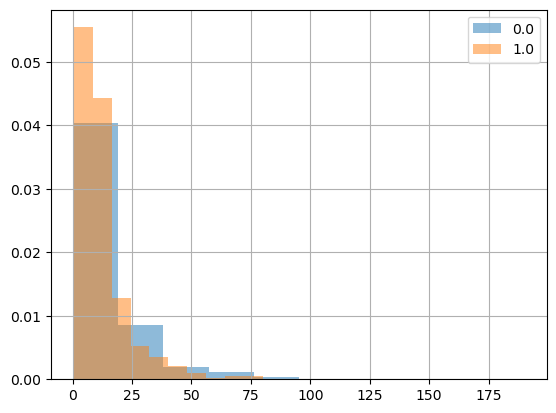

In [13]:
plant_trait_db = pd.read_csv("../../../data/plant_traits_db.csv")
plant_trait_db = plant_trait_db.dropna(subset=["is_polyploid", "flw_len_mean_AST_floret_level"]).drop_duplicates(["original_name", "is_polyploid", "flw_len_mean_AST_floret_level"])
print(plant_trait_db.groupby('is_polyploid').original_name.count())
plant_trait_db.groupby("is_polyploid").flw_len_mean_AST_floret_level.hist(legend=True, density=True, alpha=0.5)

<AxesSubplot: title={'center': 'flw_len_mean_AST_floret_level'}, xlabel='is_polyploid'>

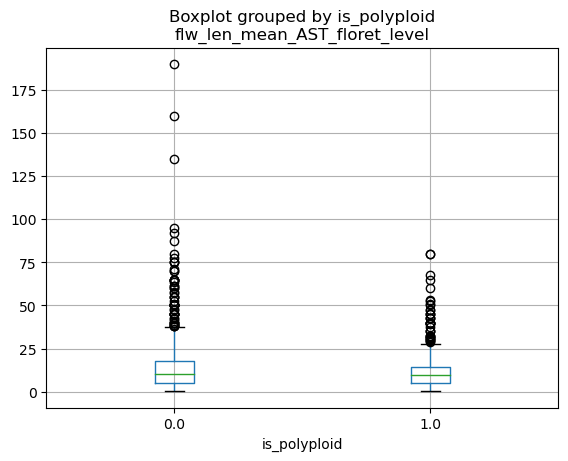

In [15]:
plant_trait_db.boxplot(column="flw_len_mean_AST_floret_level", by="is_polyploid")